<a href="https://colab.research.google.com/github/saba-sohail/Pfizer-Vaccination-Rates/blob/main/Pfizer_Team_Workspace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pfizer Challenge: You will build a set of machine learning models that (1) predicts and (2) uncovers drivers of Flu vaccination rates in various geographic territories and groups of people throughout the United States. You will use weekly vaccination coverage and cohort data from the Centers for Disease Control & Prevention.

In [1]:
# Starter Code from Pfizer Advisors
### Install required libraries if need be

# %%
import pandas as pd
from google.colab import drive # type: ignore

# %%
# Write your query to get the data from snowflake
# Change the directory below to where the data you downloaded from CDC lives
drive.mount('/content/drive')
file_path1 = '/content/drive/My Drive/Team_Pfizer/Weekly_Cumulative_Influenza_Vaccination_Coverage__Children_6_months_through_17_years__United_States_20240826.csv'
file_path2 = '/content/drive/MyDrive/Team_Pfizer/Weekly_Cumulative_Influenza_Vaccination_Coverage__Adults_18_and_Older__United_States_20240826.csv'
df_child = pd.read_csv(file_path1)
df_adult = pd.read_csv(file_path2)

# %%
# Check the column names of data frame
df_child.columns.sort_values()

# %%
# Check the column names of data frame
df_adult.columns.sort_values()

# %%
# Match the column names in the dataframes to have a consistent data set
df_child.rename(columns={
    'CI_HalfWidth': 'CI_Half_width_95pct',
    'Current_Season_Week_Ending_Label': 'Current_Season_Week_Ending',
    'Demographic_Level_Sort_Order': 'Demographic_Level_Sort',
    'Demographic_Name_Sort_Order': 'Demographic_Name_Sort',
    'Geography_Level': 'Geographic_Level',
    'Geography_Name': 'Geographic_Name',
    'geography_level_sort_order': 'Geographic_Sort',
    'Indicator Category Label': 'Indicator_Category_Label',
    'Legend_Label': 'Legend',
    'Point_Estimate': 'ND_Weekly_Estimate'
}, inplace=True)

# %%
# Concat the 2 datasets together to create one dataframe
df=pd.concat([df_adult,df_child],ignore_index=True)
df.head()

# %%
# Check basic statistics of the dataframe
df.describe()
#df.shape

ModuleNotFoundError: No module named 'google.colab'

In [17]:
df.columns.tolist()


['Geographic_Level',
 'Geographic_Name',
 'Demographic_Level',
 'Demographic_Name',
 'Indicator_Label',
 'Indicator_Category_Label',
 'Month_Week',
 'Week_Ending',
 'ND_Weekly_Estimate',
 'CI_Half_width_95pct',
 'n_unweighted',
 'Suppression_Flag',
 'Current_Season_Week_Ending',
 'Influenza_Season',
 'Legend',
 '95 CI (%)',
 'Indicator_Category_Label_Sort',
 'Demographic_Level_Sort',
 'Demographic_Name_Sort',
 'Geographic_Sort',
 'Season_Sort',
 'Legend_Sort',
 'n_weighted',
 'geography_name_order']

In [18]:
df

,Geographic_Level,Geographic_Name,Demographic_Level,Demographic_Name,Indicator_Label,Indicator_Category_Label,Month_Week,Week_Ending,ND_Weekly_Estimate,CI_Half_width_95pct,...,Legend,95 CI (%),Indicator_Category_Label_Sort,Demographic_Level_Sort,Demographic_Name_Sort,Geographic_Sort,Season_Sort,Legend_Sort,n_weighted,geography_name_order
0,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,30.800,7.8784,...,"2023-2024, Arizona, Overall (18+ years)",22.9 - 38.7,4.0,1,1,14,3,3140101,NaN,NaN
1,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,6.800,4.1669,...,"2023-2024, Arizona, Overall (18+ years)",2.6 - 11.0,2.0,1,1,14,3,3140101,NaN,NaN
2,State,Arizona,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,22.300,7.6134,...,"2023-2024, Arizona, Overall (18+ years)",14.7 - 29.9,3.0,1,1,14,3,3140101,NaN,NaN
3,State,Arizona,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,40.100,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,1.0,1,1,14,3,3140101,NaN,NaN
4,State,Arizona,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,40.100,1.8745,...,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,NaN,1,1,14,3,3140101,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21790,State,Delaware,Overall,Overall,Up-to-date,Yes,March Week 5,2024-03-30,0.592,5.3269,...,"2023-2024, Delaware. Overall (6 months-17 years)",53.9 - 64.5,NaN,1,1,3,1,1190101,750738.0,19.0
21791,State,District of Columbia,Overall,Overall,Up-to-date,Yes,March Week 5,2024-03-30,0.698,4.3661,...,"2023-2024, District of Columbia. Overall (6 mo...",65.4 - 74.2,NaN,1,1,3,1,1200101,1581304.0,20.0
21792,State,Florida,Overall,Overall,Up-to-date,Yes,March Week 5,2024-03-30,0.423,4.4158,...,"2023-2024, Florida. Overall (6 months-17 years)",37.9 - 46.7,NaN,1,1,3,1,1210101,3261770.0,21.0
21793,State,Georgia,Overall,Overall,Up-to-date,Yes,March Week 5,2024-03-30,0.445,4.4035,...,"2023-2024, Georgia. Overall (6 months-17 years)",40.1 - 48.9,NaN,1,1,3,1,1220101,3603082.0,22.0


In [19]:
#drop the sort columns
sort_columns = ['Indicator_Category_Label_Sort',
'Demographic_Level_Sort',
'Demographic_Name_Sort',
'Geographic_Sort',
'Season_Sort',
'Legend_Sort']
df=df.drop(columns=sort_columns)
df

,Geographic_Level,Geographic_Name,Demographic_Level,Demographic_Name,Indicator_Label,Indicator_Category_Label,Month_Week,Week_Ending,ND_Weekly_Estimate,CI_Half_width_95pct,n_unweighted,Suppression_Flag,Current_Season_Week_Ending,Influenza_Season,Legend,95 CI (%),n_weighted,geography_name_order
0,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely or probably will not get a vaccine,January Week 4,NaN,30.800,7.8784,159.0,0.0,01/27/2024 12:00:00 AM,2023-2024,"2023-2024, Arizona, Overall (18+ years)",22.9 - 38.7,NaN,NaN
1,State,Arizona,Overall,18+ years,4-level vaccination and intent,Definitely will get a vaccine,January Week 4,NaN,6.800,4.1669,159.0,0.0,01/27/2024 12:00:00 AM,2023-2024,"2023-2024, Arizona, Overall (18+ years)",2.6 - 11.0,NaN,NaN
2,State,Arizona,Overall,18+ years,4-level vaccination and intent,Probably will get a vaccine or are unsure,January Week 4,NaN,22.300,7.6134,159.0,0.0,01/27/2024 12:00:00 AM,2023-2024,"2023-2024, Arizona, Overall (18+ years)",14.7 - 29.9,NaN,NaN
3,State,Arizona,Overall,18+ years,4-level vaccination and intent,Received a vaccination,January Week 4,NaN,40.100,1.8745,8592.0,0.0,01/27/2024 12:00:00 AM,2023-2024,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,NaN,NaN
4,State,Arizona,Overall,18+ years,Up-to-date,Yes,January Week 4,NaN,40.100,1.8745,8592.0,0.0,01/27/2024 12:00:00 AM,2023-2024,"2023-2024, Arizona, Overall (18+ years)",38.2 - 41.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21790,State,Delaware,Overall,Overall,Up-to-date,Yes,March Week 5,2024-03-30,0.592,5.3269,1727.0,0.0,2024-03-30,2023-2024,"2023-2024, Delaware. Overall (6 months-17 years)",53.9 - 64.5,750738.0,19.0
21791,State,District of Columbia,Overall,Overall,Up-to-date,Yes,March Week 5,2024-03-30,0.698,4.3661,2884.0,0.0,2024-03-30,2023-2024,"2023-2024, District of Columbia. Overall (6 mo...",65.4 - 74.2,1581304.0,20.0
21792,State,Florida,Overall,Overall,Up-to-date,Yes,March Week 5,2024-03-30,0.423,4.4158,1933.0,0.0,2024-03-30,2023-2024,"2023-2024, Florida. Overall (6 months-17 years)",37.9 - 46.7,3261770.0,21.0
21793,State,Georgia,Overall,Overall,Up-to-date,Yes,March Week 5,2024-03-30,0.445,4.4035,1740.0,0.0,2024-03-30,2023-2024,"2023-2024, Georgia. Overall (6 months-17 years)",40.1 - 48.9,3603082.0,22.0


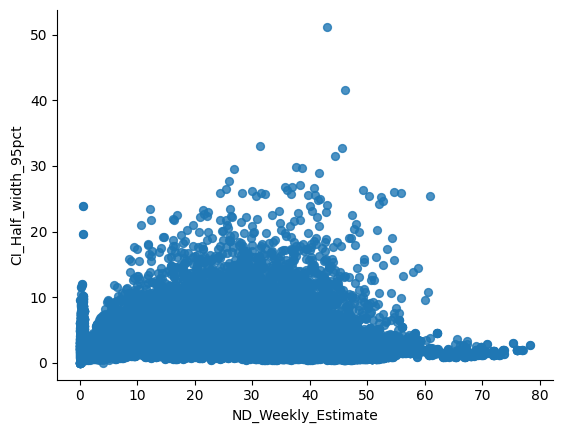

In [20]:
# ND_Weekly_Estimate vs CI_Half_width_95pct

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='ND_Weekly_Estimate', y='CI_Half_width_95pct', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

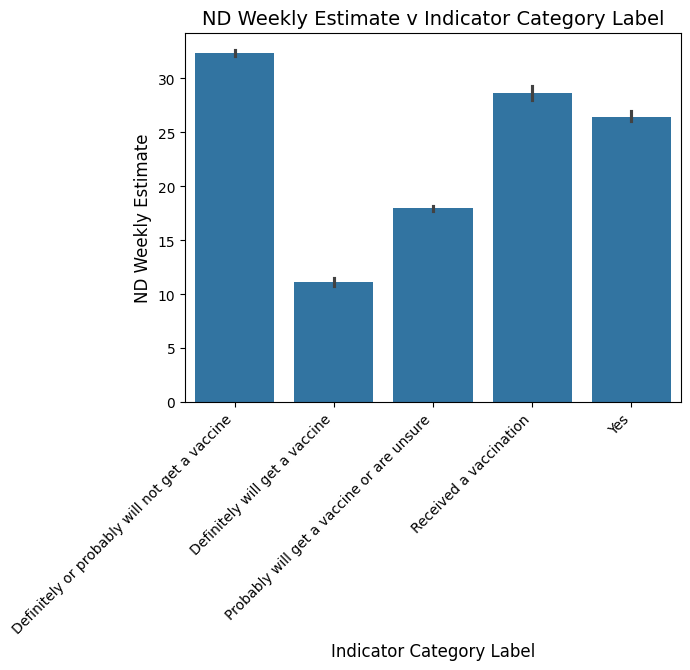

In [21]:
#plot of Indicator_Category Label v. ND Weekly Estimate
#ND Weekly estimate: is Flu vaccination Coverage

import seaborn as sns
sns.barplot(x='Indicator_Category_Label', y='ND_Weekly_Estimate', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('ND Weekly Estimate v Indicator Category Label', fontsize=14)
plt.xlabel('Indicator Category Label', fontsize=12)
plt.ylabel('ND Weekly Estimate', fontsize=12)
plt.show()